## Neurophysics 2 -- assignment: working memory

see [12. Spatial Working Memory (Compte et. al.)](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/spatial-working-memory.html)

In [ ]:
!pip install neurodynex3
!pip install brian2
%matplotlib inline
from neurodynex3.working_memory_network import wm_model
from neurodynex3.tools import plot_tools
import brian2 as b2
import numpy as np

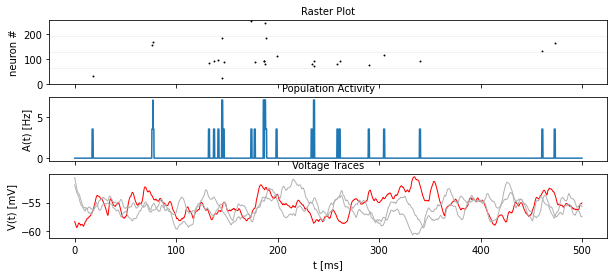

In [2]:
wm_model.getting_started()

### Question 1

go through the questions in section [12.1](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/spatial-working-memory.html#exercise-spontanous-bump-formation) and write a brief report of your observations

## Answer Q1
### External poisson population
- There are 1000 neurons in the external poisson population by default
- The poisson firing rate is 1.4Hz, therefore 1.4 spikes/second are expected
- the excitatory and inhibitory population will be targeted by a presynaptic spike
- the differential equation for dx/dt which regulates the excitatory population is governed by tau_NMDA_x, which has the value $\tau = 65ms$



### Unstructured input
- The population activity takes values of A(t) = [0,1,2,3] Hz throughout the second plot
- The firing frequency has increased, but the voltage traces seem to be quite similar in amplitude, but there is  higher variability for the higher poisson frequency.
- I do not have any specific observations, other than that there is great variability in the firing frequencies of the population ensembles.

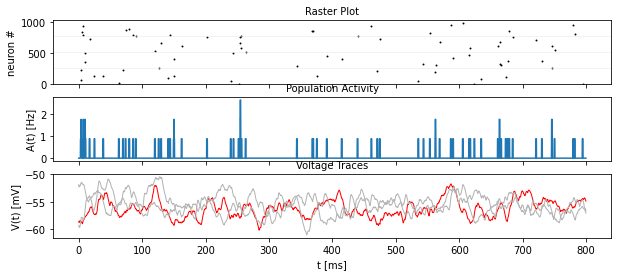

In [7]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

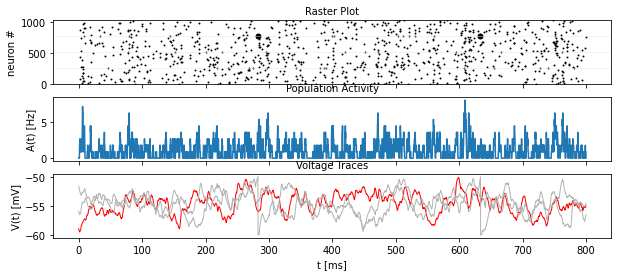

In [6]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=2.2 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

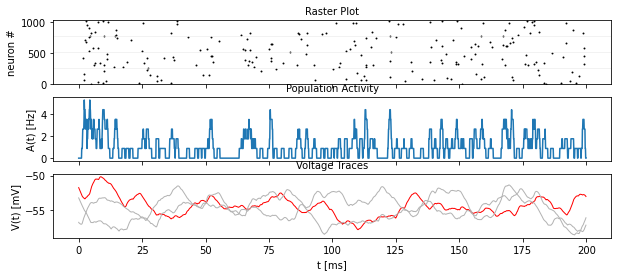

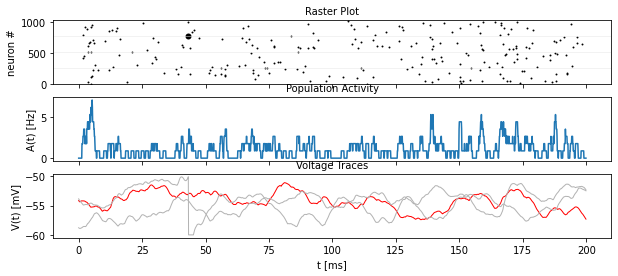

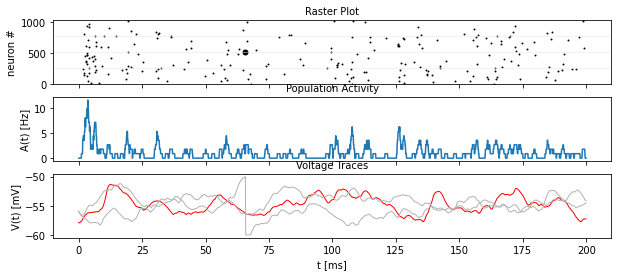

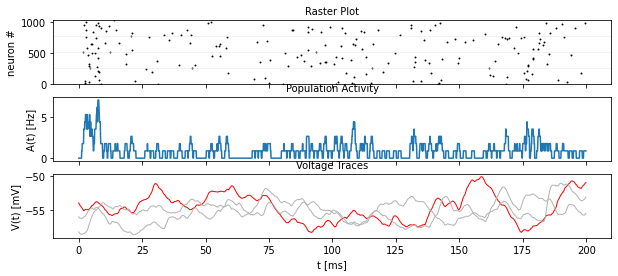

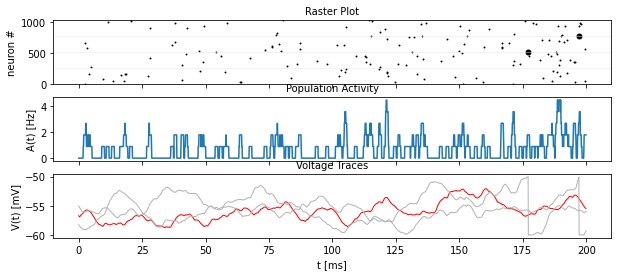

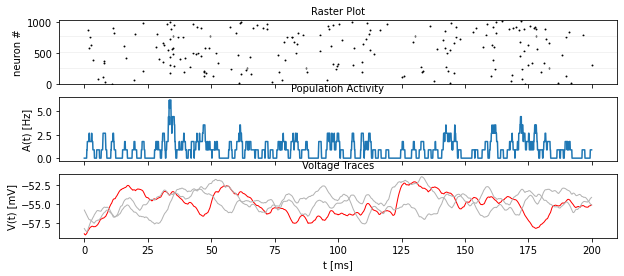

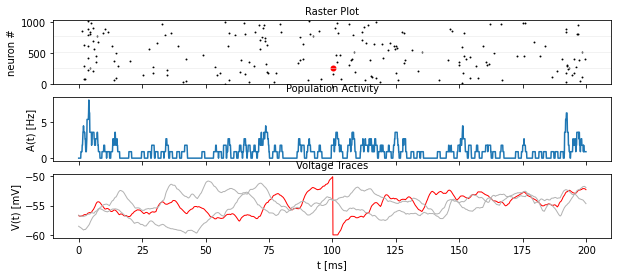

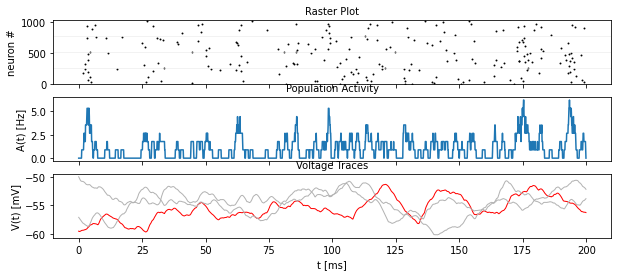

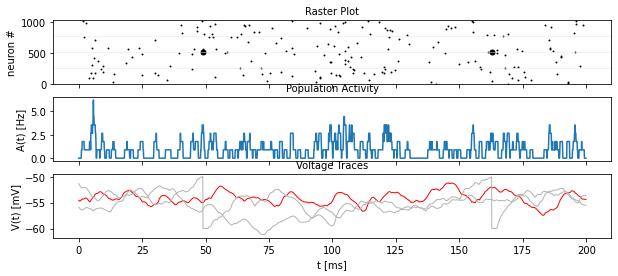

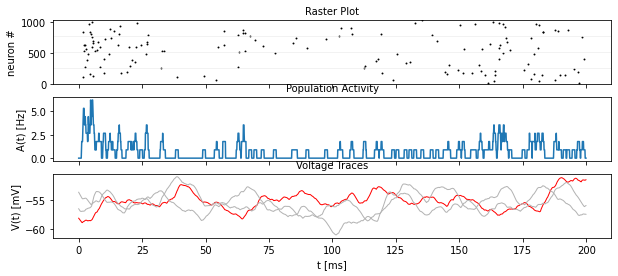

In [8]:
for i in range(10):
  rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(sim_time=200. * b2.ms, poisson_firing_rate=2.2 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
  plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
  plt.show()

### Weight profile
- For Jpos = 1, the weight profile is linear; for Jpos < 1, the weight profile has a through and for Jpos > 1 the weight profile has a peak. For varying Jpos > 1, the only parameter that significantly changes is the amplitude of the peak. Ther position of the peak seems to be stationary around 150ms.
- Jpos = 2.3 does not show any significant deviations?
- Increasing $\sigma_{wp}$ increases the broadness of the bump

RUN WITH JPOS = 0.5


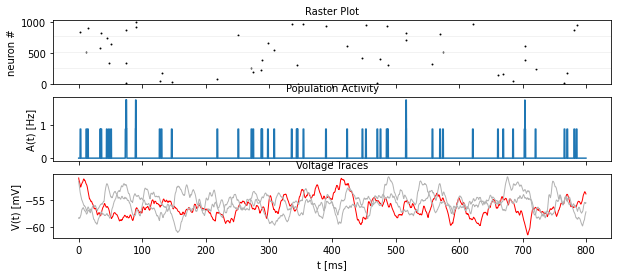

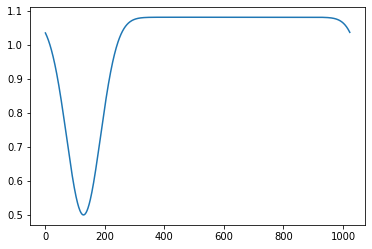

RUN WITH JPOS = 1.0


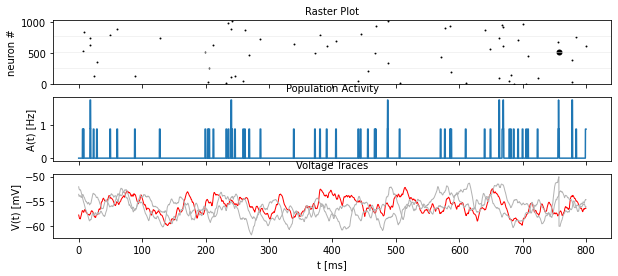

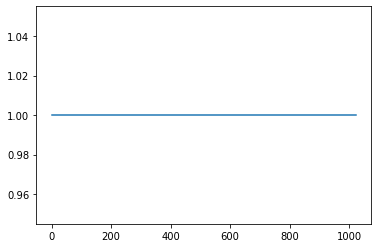

RUN WITH JPOS = 1.5


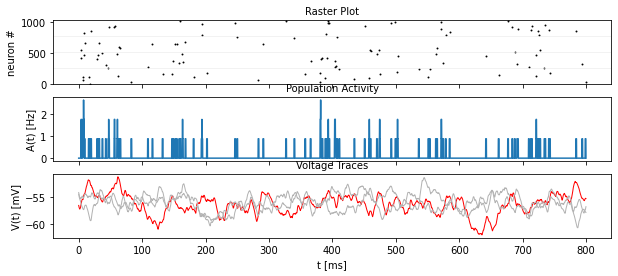

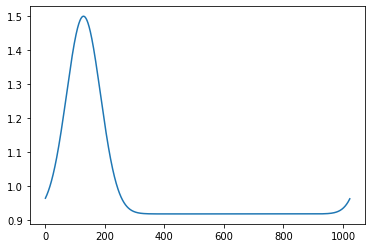

RUN WITH JPOS = 2.0


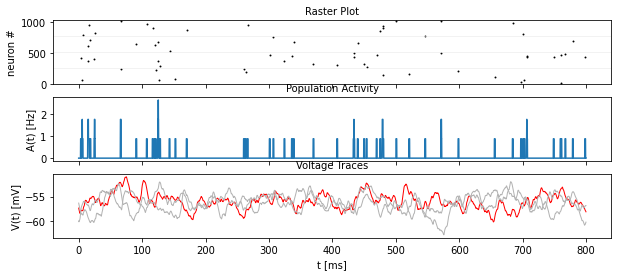

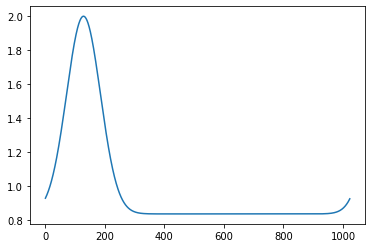

RUN WITH JPOS = 2.5


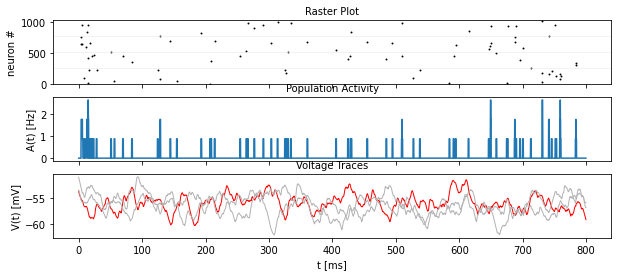

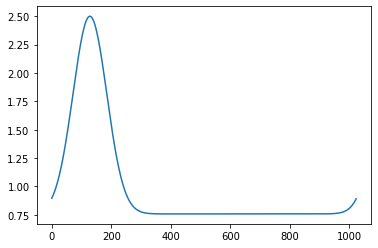

RUN WITH JPOS = 3.0


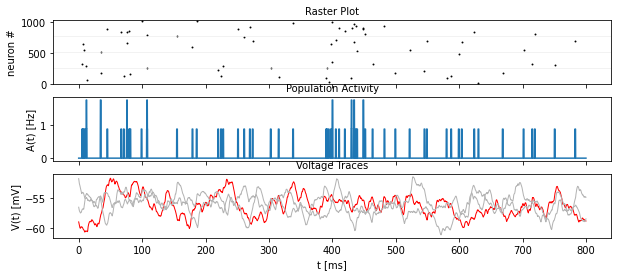

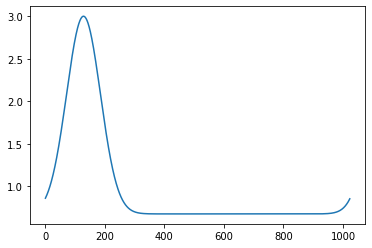

In [12]:
for i in np.linspace(0.5,3,6):
  rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=i)
  plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

  print('RUN WITH JPOS = {}'.format(i))
  plt.figure()
  plt.plot(weight_profile_45)
  plt.show()

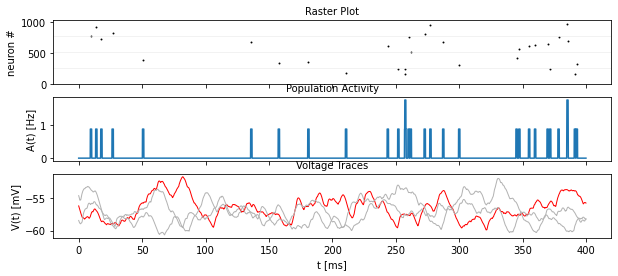

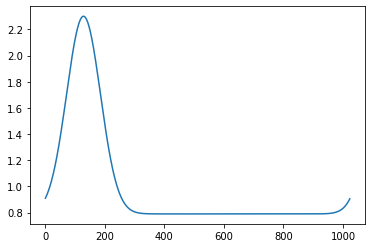

In [9]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=400. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=2.3)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

plt.figure()
plt.plot(weight_profile_45)
plt.show()

RUN WITH sigma_weight_profile = 5.0


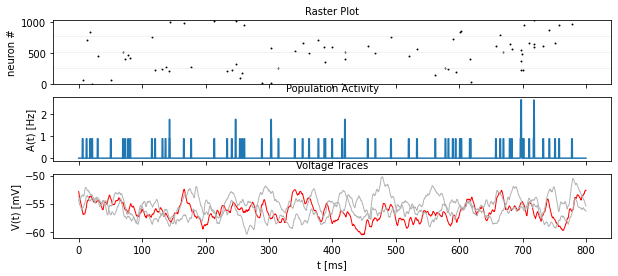

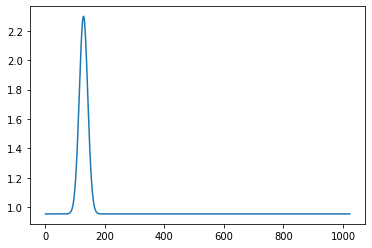

RUN WITH sigma_weight_profile = 14.0


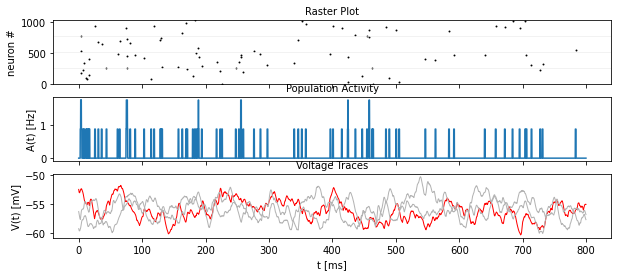

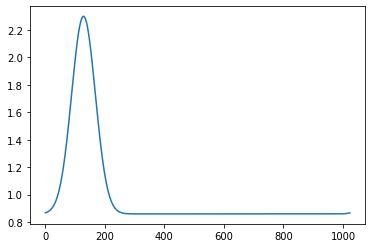

RUN WITH sigma_weight_profile = 23.0


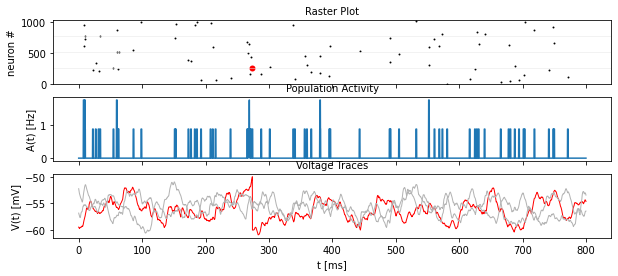

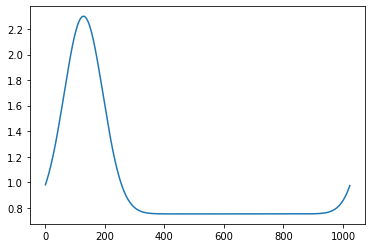

RUN WITH sigma_weight_profile = 32.0


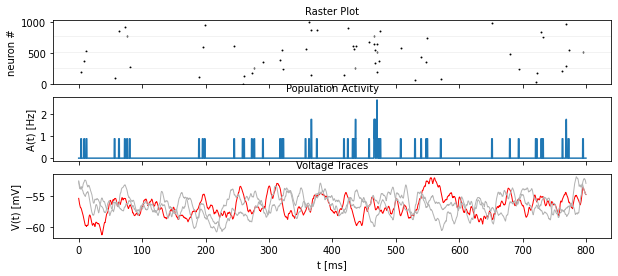

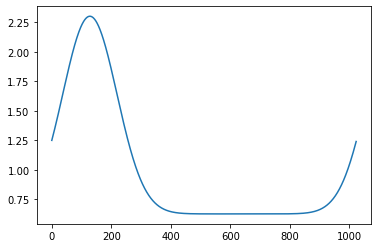

RUN WITH sigma_weight_profile = 41.0


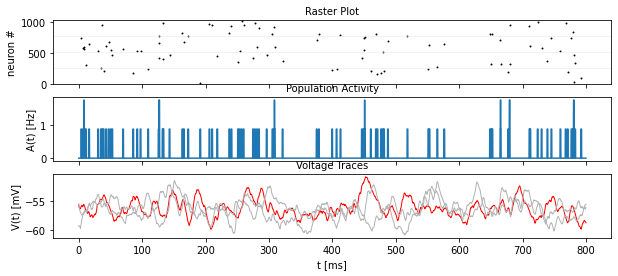

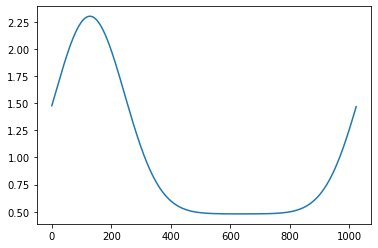

RUN WITH sigma_weight_profile = 50.0


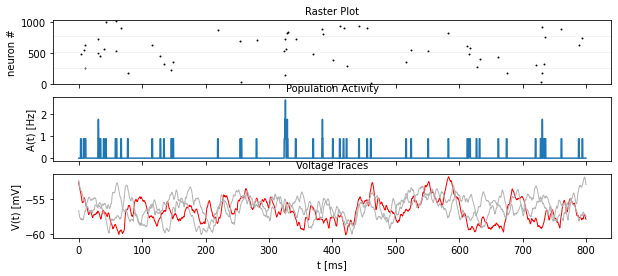

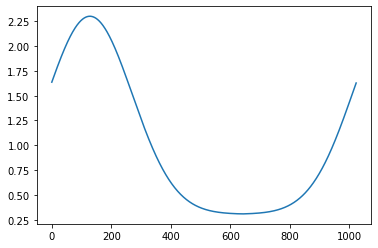

In [14]:
for i in np.linspace(5,50,6):
  rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, sigma_weight_profile=i, Jpos_excit2excit=2.3)
  plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

  print('RUN WITH sigma_weight_profile = {}'.format(i))
  plt.figure()
  plt.plot(weight_profile_45)
  plt.show()

### Question 2

see section [12.2.1](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/spatial-working-memory.html#question-integration-of-input)

Run the simulation below and answer the following questions: 

1. At which time can you identify a change in the population activity? How does that compare to the time when the stimulus is applied?
2. What is the population activity at the end of the simulation?
3. Increase the stimulus strength to 0.5namp. What happens when the stimulus stops?
4. Increase the stimulus width to 60deg (stimulus_strength=0.1 * b2.namp, stimulus center = 120deg). How does the bump shape change?

## Answers Q2
- For .06namp: 50ms after stimulus start an increase in activity is observed.

- For 0.5namp: At the starting time of the stimulus a difference is observed in the activity. At the end of the simulation it is still elevated, but lower than when the stimulus was applied. This also confirms the idea of memory in the network.

- for increased stimulus width: the activity gradually increases, and significantly differs around 75ms after the start of the stimulus. It is also more persistent compared to the higher stimulation, having higher values after stimulation stops.

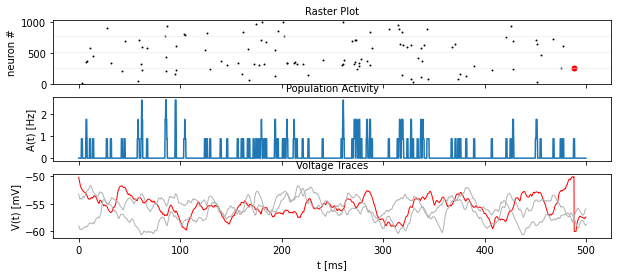

In [16]:
import matplotlib.pyplot as plt

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, \
voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = \
wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)

fig, ax_raster, ax_rate, ax_voltage = \
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

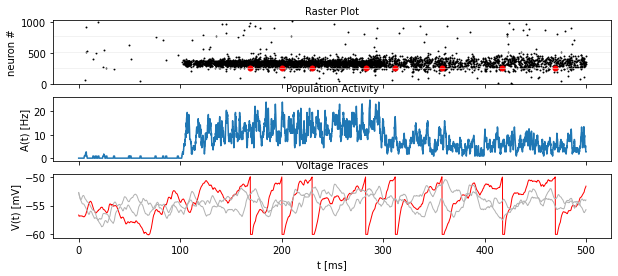

In [17]:

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, \
voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = \
wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.5 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)

fig, ax_raster, ax_rate, ax_voltage = \
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

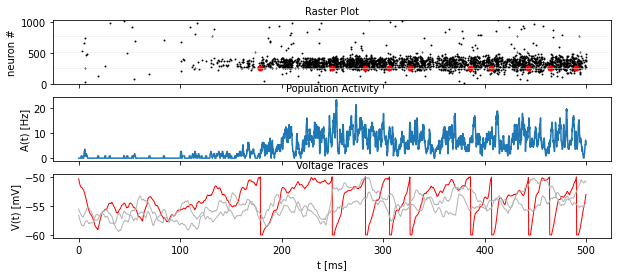

In [18]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, \
voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = \
wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=60, stimulus_strength=.1 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)

fig, ax_raster, ax_rate, ax_voltage = \
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

### Question 3 

see [section 12.2.2](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/spatial-working-memory.html#question-role-of-the-inhibitory-population) 

We can remove the inhibitory population by setting its size to the minimal size N_inhibitory = 1. If we also deactivate the external input we can study the effect of the recurrent weights within the excitatory population:

Parameters: N_inhibitory = 1, stimulus_strength=0.65 * b2.namp, t_stimulus_start=5 * b2.ms, t_stimulus_duration=25 * b2.ms, sim_time=80. * b2.ms

code is below. 

Questions: 
1. Before running the simulation: What do you expect to see?
2. Run the simulation with the given parameters. Describe your observations.
3. Now run a "normal" simulation as above, but plot inhibitory activity instead. What are your conclusions on the role of the interneurons?

## Answers Q3
- Given the stimulus strength, I expect a very strong activation pattern. Moreover, this is elevated by the inhibitory neurons being inactive. 
- Unclear to me what is supposed to be seen...

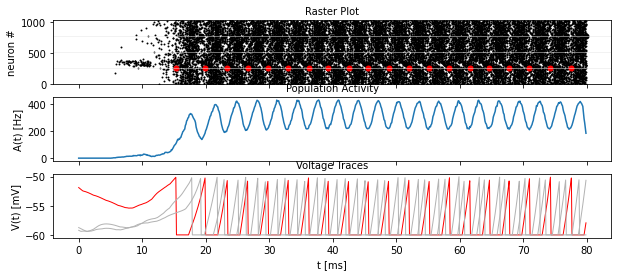

In [19]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, \
voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = \
wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, 
                     stimulus_strength=.65 * b2.namp, t_stimulus_start=5 * b2.ms, 
                     t_stimulus_duration=25 * b2.ms, sim_time=80. * b2.ms,
                     N_inhibitory = 1  
                     )
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, 
                                                                       voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

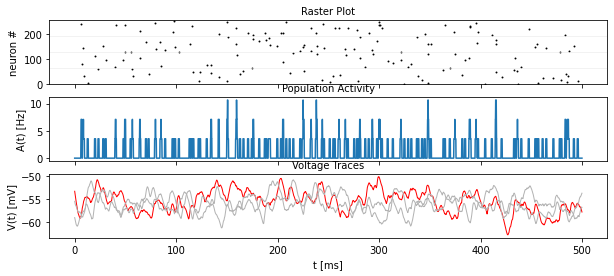

In [20]:
# show inhibition
t_stimulus_start = 100 * b2.ms
t_stimulus_duration=200 * b2.ms
sim_time=500. * b2.ms
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit,\
rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = \
wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, 
                     t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)

fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_inhib, spike_monitor_inhib, 
                                                                       voltage_monitor_inhib, t_min=0. * b2.ms)
plt.show()

### Question 4 

Computing the population vector see section [12.3](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/spatial-working-memory.html#exercise-decoding-the-population-activity-into-a-population-vector)

The two required helper functions are here below. Please test them to verify that they have the desired behavior

In [21]:
def get_orientation(idx_list, N):
    orients = [(i + 0.5) * 2*np.pi / N for i in idx_list]
    return orients

In [22]:
def get_spike_count(spike_monitor, spike_index_list, t_min, t_max):
    spike_trains = spike_monitor.spike_trains()
    spike_count_list = [ np.sum((spike_trains[i]>=t_min) & (spike_trains[i]<(t_max)))  for i in spike_index_list]
    spike_count_list = np.array(spike_count_list)
    return spike_count_list

Now let's combine these two functions in order to compute the population vector 

In [23]:
def get_theta_time_series(spike_monitor, idx_monitored_neurons, t_snapshots, t_window_width):
    N = len(spike_monitor_excit.spike_trains())
    thetas = get_orientation(idx_monitored_neurons, N)
    popvec = np.zeros((len(t_snapshots),))
    for t in range(len(t_snapshots)-1):
        
        counts = get_spike_count(spike_monitor, idx_monitored_neurons, t_snapshots[t], t_snapshots[t+1])
        c = np.sum(counts * np.cos(thetas)) / np.sum(counts)
        s = np.sum(counts * np.sin(thetas)) / np.sum(counts)
        popvec[t] = np.arctan2(s, c)
    return popvec

Simulate a network of size N_excitatory = 2048. Apply a stimulus from t=100ms to t=300ms. Plot theta(t). Note that when you increase the size of the excitatory population you also have to increase the inhibitory population and the weights (‘’N_inhibitory’’ and ‘’weight_scaling_factor’‘). When doubling the number of presynaptic neurons, you have to scale the weights by 0.5 to keep the total synaptic input the same. You will have to check the python code in order to find out the default values of these parameters. Use the 
Repeat the simulation at least 3 times. Plot each time series theta(t) into the same figure.
Change the size of the network to N_excitatory = 512 and redo the previous steps.
Discuss your observations.

WARNING    <ipython-input-23-66006d97f4a7>:8: RuntimeWarning: invalid value encountered in double_scalars
  c = np.sum(counts * np.cos(thetas)) / np.sum(counts)
 [py.warnings]
  c = np.sum(counts * np.cos(thetas)) / np.sum(counts)

WARNING    <ipython-input-23-66006d97f4a7>:9: RuntimeWarning: invalid value encountered in double_scalars
  s = np.sum(counts * np.sin(thetas)) / np.sum(counts)
 [py.warnings]
  s = np.sum(counts * np.sin(thetas)) / np.sum(counts)

WARNING    <ipython-input-23-66006d97f4a7>:8: RuntimeWarning: invalid value encountered in double_scalars
  c = np.sum(counts * np.cos(thetas)) / np.sum(counts)
 [py.warnings]
  c = np.sum(counts * np.cos(thetas)) / np.sum(counts)

WARNING    <ipython-input-23-66006d97f4a7>:9: RuntimeWarning: invalid value encountered in double_scalars
  s = np.sum(counts * np.sin(thetas)) / np.sum(counts)
 [py.warnings]
  s = np.sum(counts * np.sin(thetas)) / np.sum(counts)

WARNING    <ipython-input-23-66006d97f4a7>:8: RuntimeWarning: invalid va

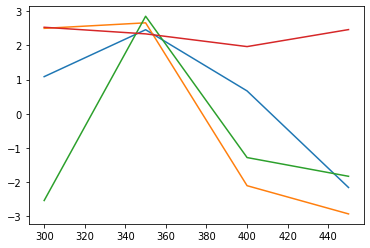

In [31]:
for i in range(4):
  rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit,\
  rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = \
  wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, 
                      t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)


  # run the simulation before running this code 
  t_stimulus_start = 100 * b2.ms
  t_stimulus_duration=200 * b2.ms
  sim_time=2000. * b2.ms 

  t_window_width = 50 * b2.ms
  snapshot_interval = t_window_width
  N = len(spike_monitor_excit.spike_trains())
  # Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
  t_snapshots = range(
      int(np.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
      int(np.floor((sim_time-t_window_width/2)/b2.ms)),  # Subtract half window. Avoids an out-of-bound error later.
      int(round(snapshot_interval/b2.ms))  # spacing between time stamps
      )*b2.ms

  # how your function get_theta_time_series could be called:
  theta_ts = get_theta_time_series(spike_monitor_excit, range(N), t_snapshots, t_window_width)

  # plot theta vs time using pyplot
  plt.plot(t_snapshots[:-1]/b2.ms, theta_ts[:-1])

WARNING    <ipython-input-23-66006d97f4a7>:8: RuntimeWarning: invalid value encountered in double_scalars
  c = np.sum(counts * np.cos(thetas)) / np.sum(counts)
 [py.warnings]
  c = np.sum(counts * np.cos(thetas)) / np.sum(counts)

WARNING    <ipython-input-23-66006d97f4a7>:9: RuntimeWarning: invalid value encountered in double_scalars
  s = np.sum(counts * np.sin(thetas)) / np.sum(counts)
 [py.warnings]
  s = np.sum(counts * np.sin(thetas)) / np.sum(counts)

WARNING    <ipython-input-23-66006d97f4a7>:8: RuntimeWarning: invalid value encountered in double_scalars
  c = np.sum(counts * np.cos(thetas)) / np.sum(counts)
 [py.warnings]
  c = np.sum(counts * np.cos(thetas)) / np.sum(counts)

WARNING    <ipython-input-23-66006d97f4a7>:9: RuntimeWarning: invalid value encountered in double_scalars
  s = np.sum(counts * np.sin(thetas)) / np.sum(counts)
 [py.warnings]
  s = np.sum(counts * np.sin(thetas)) / np.sum(counts)

WARNING    <ipython-input-23-66006d97f4a7>:8: RuntimeWarning: invalid va

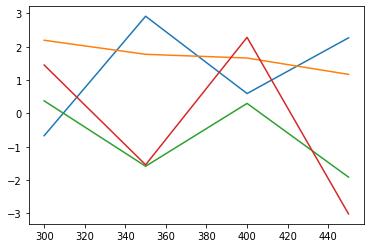

In [32]:
for i in range(4):
  rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit,\
  rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = \
  wm_model.simulate_wm(N_excitatory = 512, weight_scaling_factor = 1.0, stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, 
                      t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)


  # run the simulation before running this code 
  t_stimulus_start = 100 * b2.ms
  t_stimulus_duration=200 * b2.ms
  sim_time=2000. * b2.ms 

  t_window_width = 50 * b2.ms
  snapshot_interval = t_window_width
  N = len(spike_monitor_excit.spike_trains())
  # Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
  t_snapshots = range(
      int(np.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
      int(np.floor((sim_time-t_window_width/2)/b2.ms)),  # Subtract half window. Avoids an out-of-bound error later.
      int(round(snapshot_interval/b2.ms))  # spacing between time stamps
      )*b2.ms

  # how your function get_theta_time_series could be called:
  theta_ts = get_theta_time_series(spike_monitor_excit, range(N), t_snapshots, t_window_width)

  # plot theta vs time using pyplot
  plt.plot(t_snapshots[:-1]/b2.ms, theta_ts[:-1])